# Email Spam Filtering Task 6

Technohacks

By :- Miss. Sweety Chandrakant Kodam

# Import required library files

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd

In [4]:
message=pd.read_csv('spam.csv',encoding='ISO-8859-1')

# Loading Dataset

In [5]:
message=message[['v1','v2']]

In [6]:
message.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
message.columns=['label','message']

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(message['label'])
y=y.iloc[:,1].values

<Axes: >

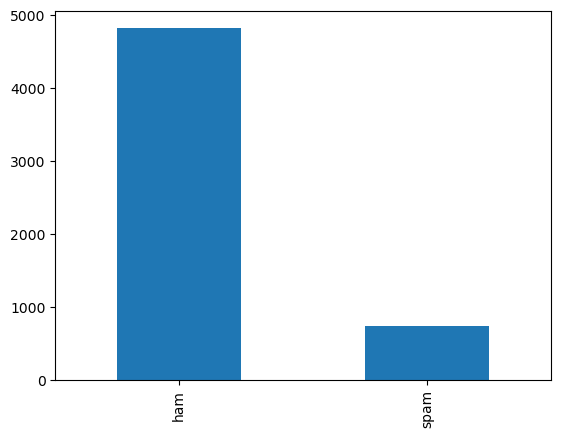

In [11]:
message['label'].value_counts().plot(kind='bar')

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [14]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
print(confusion_matrix(y_test,pred))

[[964   1]
 [ 25 125]]


In [17]:
print(accuracy_score(y_test,pred))

0.9766816143497757


In [18]:
model_2=DecisionTreeClassifier()
model_2.fit(X_train,y_train)
pred2=model_2.predict(X_test)

In [19]:
print(confusion_matrix(y_test,pred2)),print(accuracy_score(y_test,pred2))

[[957   8]
 [ 20 130]]
0.9748878923766816


(None, None)

In [20]:
model_3=MultinomialNB()
model_3.fit(X_train,y_train)
pred3=model_3.predict(X_test)

In [21]:
print(confusion_matrix(y_test,pred3)),print(accuracy_score(y_test,pred3))

[[955  10]
 [ 10 140]]
0.9820627802690582


(None, None)